In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import requests
import datetime
%matplotlib inline
sns.set()

## From A Talk By Andrew Jenkins
2020-03-18

In [2]:
def rule1(bw1, bw2, tot_bw): 
    res = tot_bw - bw1 - bw2
    if res > 0:
        s = True
        o = res
    else:
        s = False
        o = tot_bw - np.random.choice([bw1, bw2])   # drop 1 packet
    f = np.abs(bw2 - bw1)
    return s, (tot_bw - o)/tot_bw, 1 - f/tot_bw

In [3]:
def player(load, success, e=1, f=0.8):
    if success:
        load += e
    else:
        load *= f
    return load

In [4]:
def trial(tot_bw = 15):
    p1 = []
    p2 = []
    optimal = []
    fairness = []
    success = False
    
    # init load requesta
    l1 = np.random.randint(0,tot_bw)
    l2 = np.random.randint(0,tot_bw)
    for t in range(100):
        l1 = player(l1, success, e=1, f=0.5)
        l2 = player(l2, success, e=1, f=0.5)
        success, opt, fair = rule1(l1, l2, tot_bw)
        optimal.append(opt)
        fairness.append(fair)
        p1.append(l1), p2.append(l2)
    return (p1, p2, optimal, fairness)

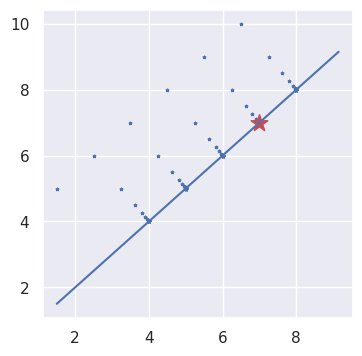

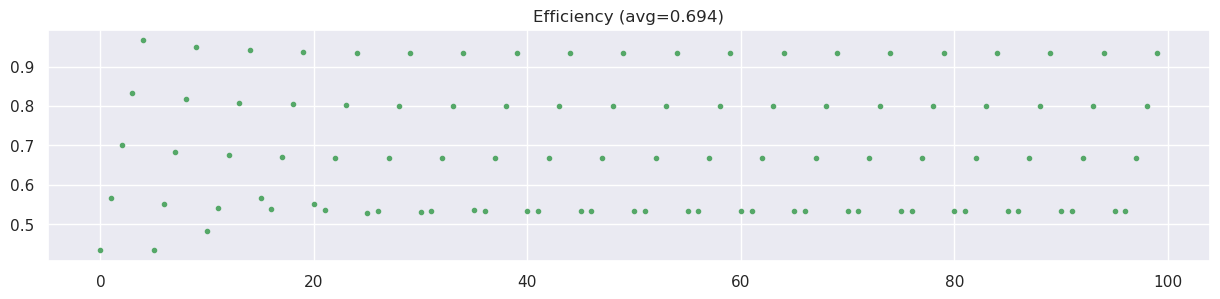

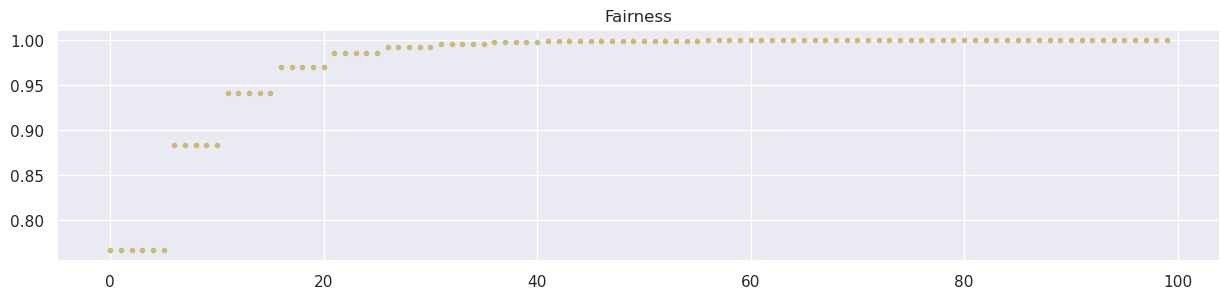

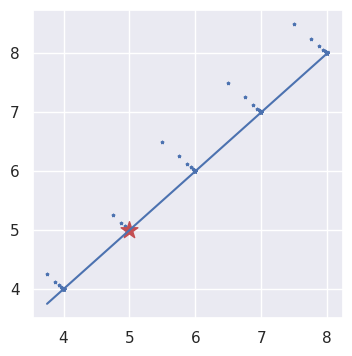

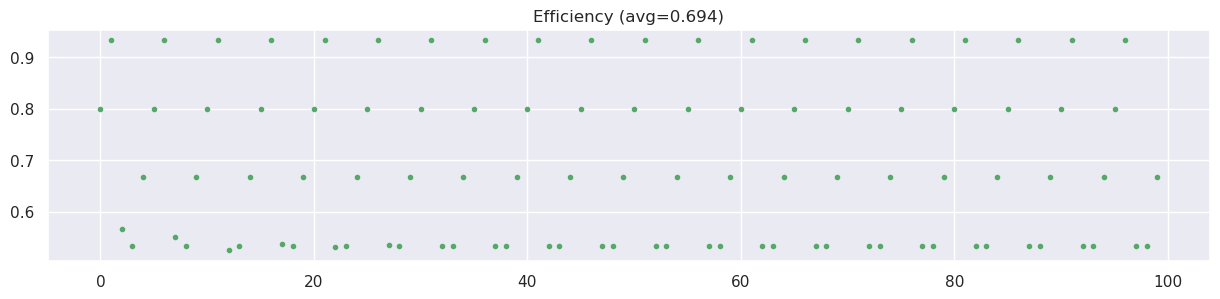

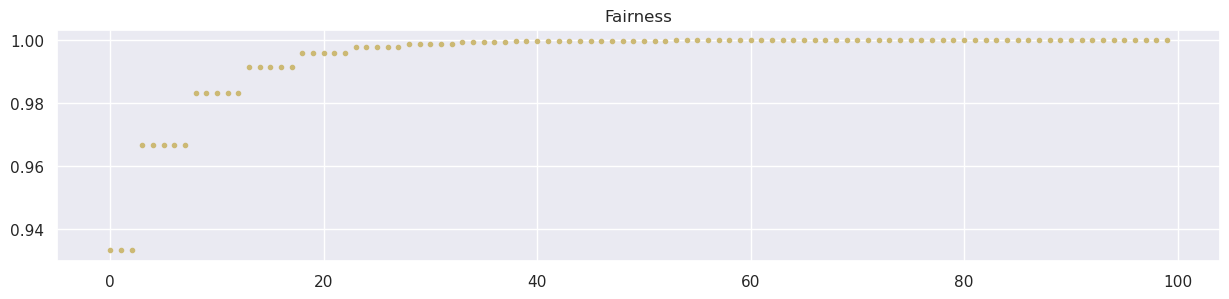

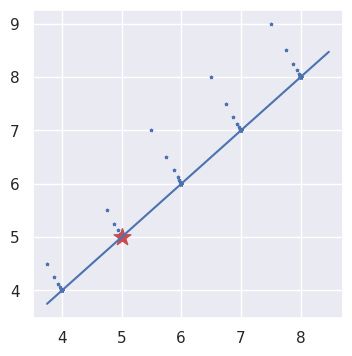

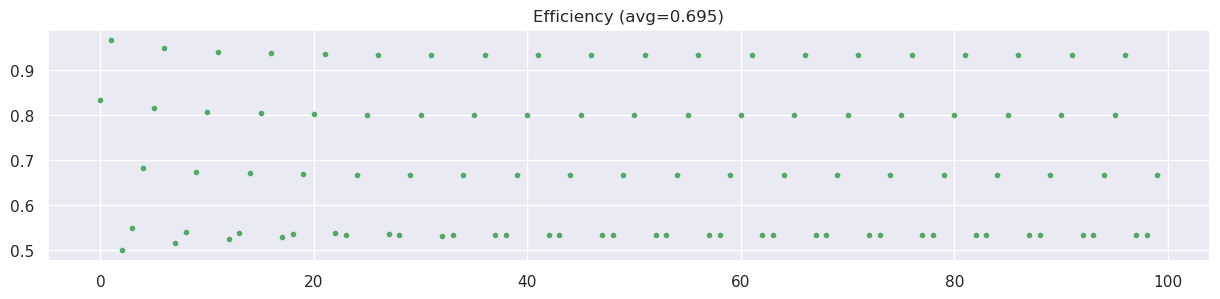

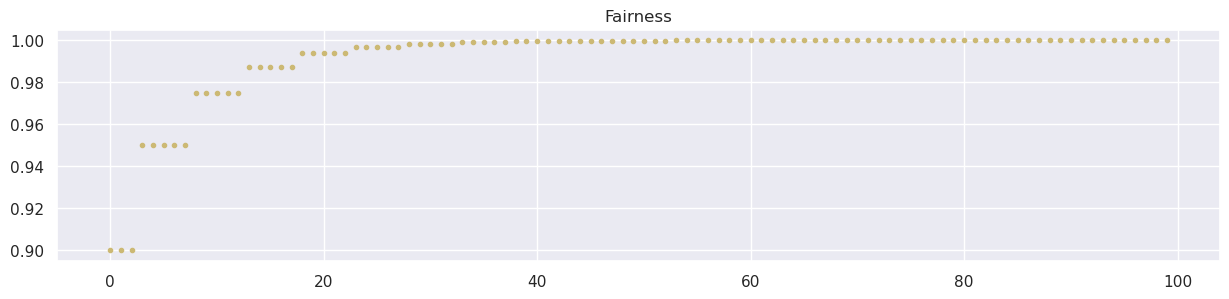

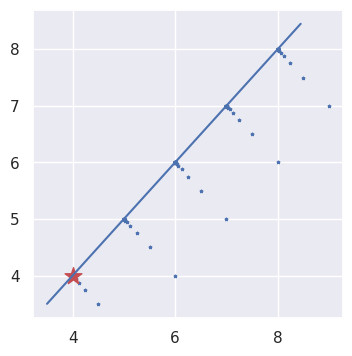

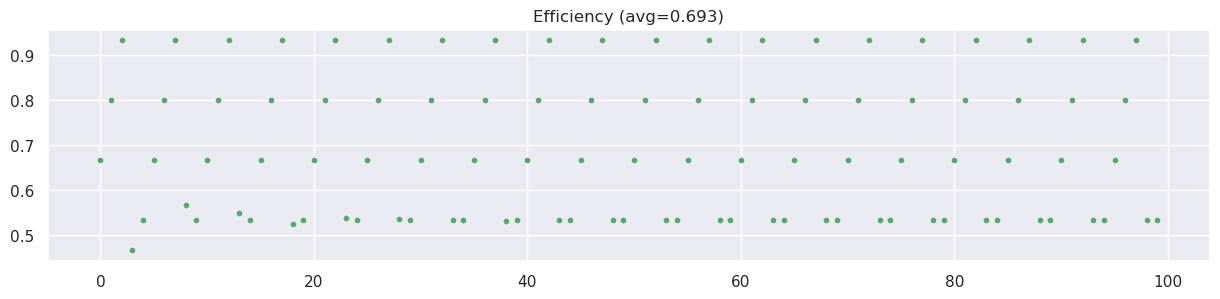

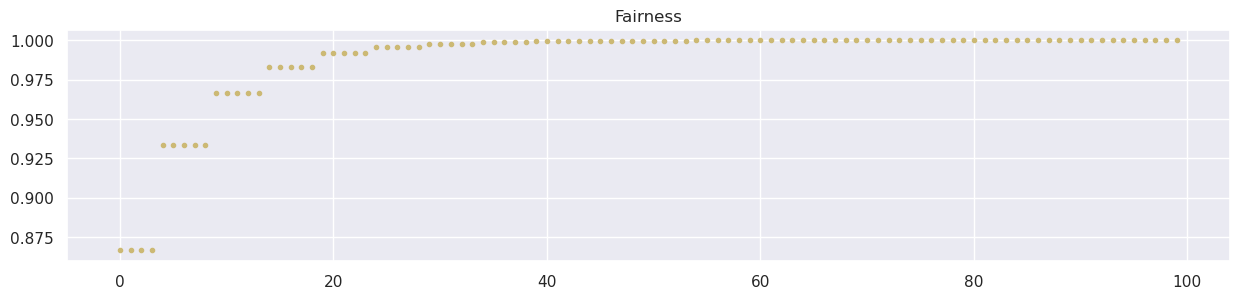

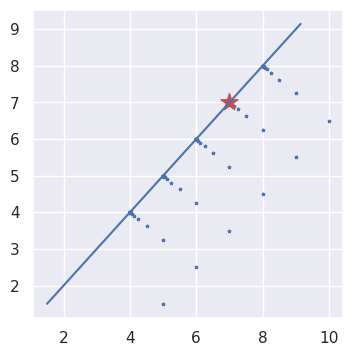

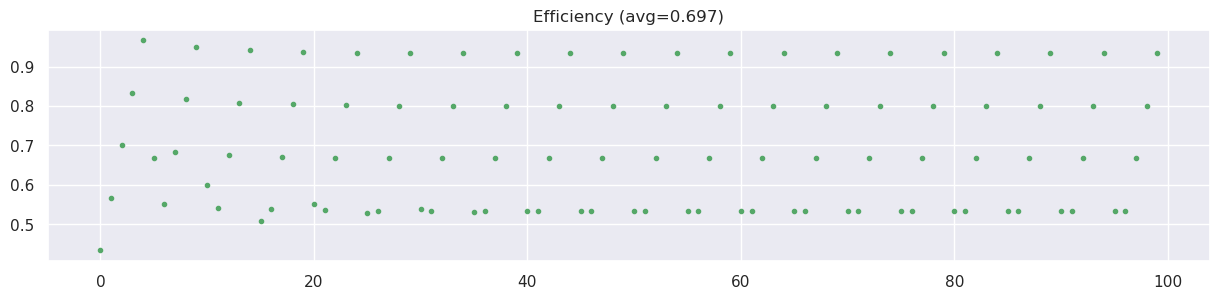

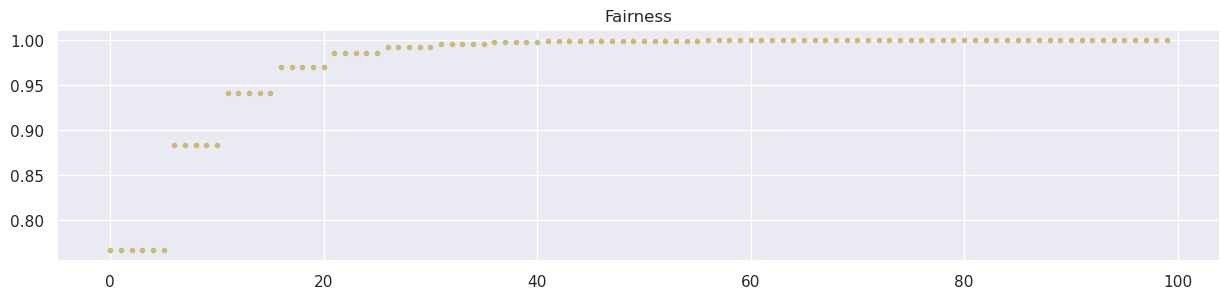

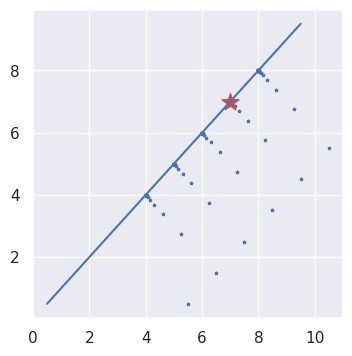

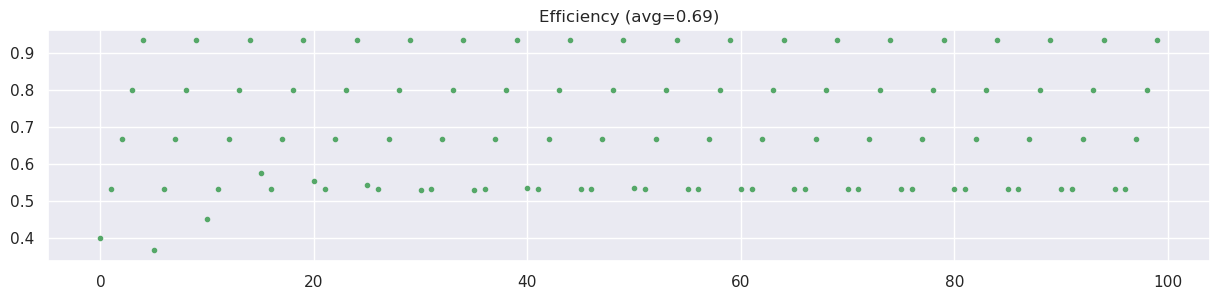

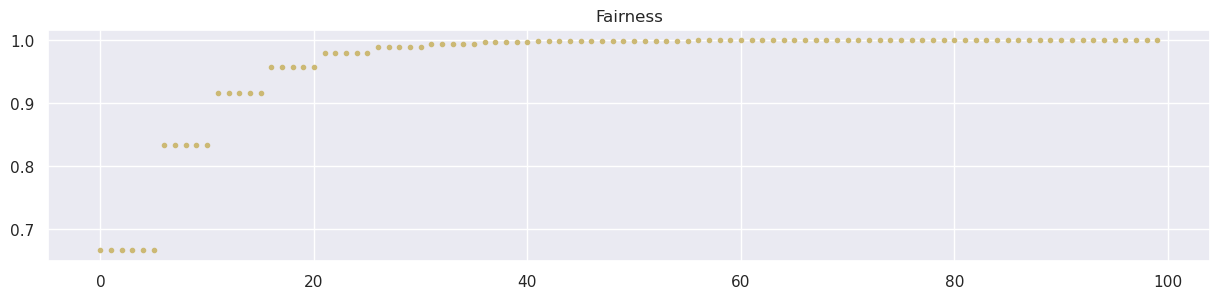

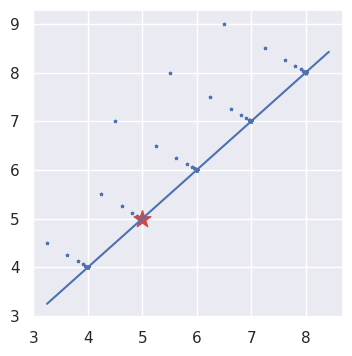

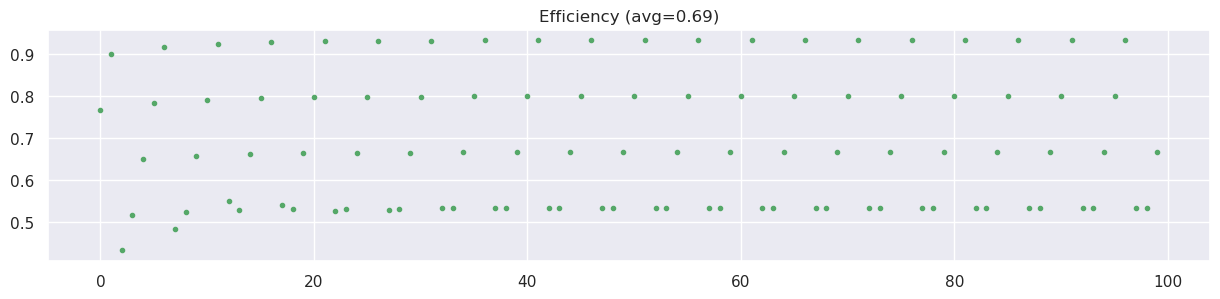

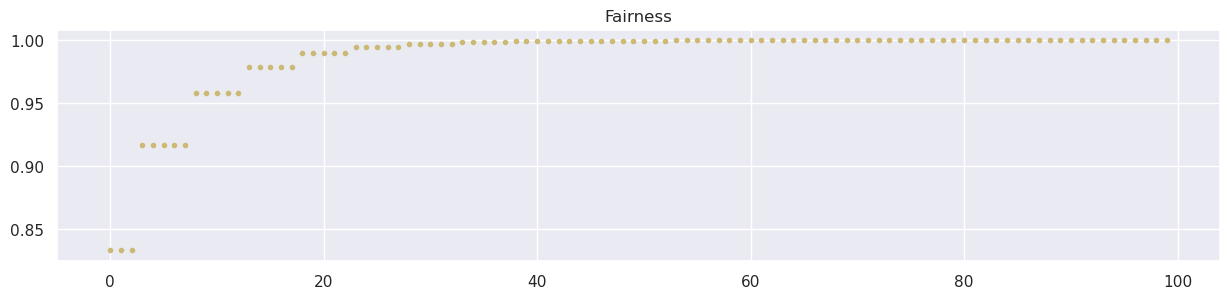

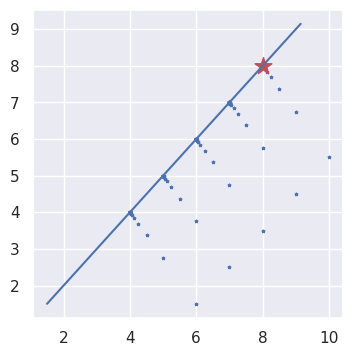

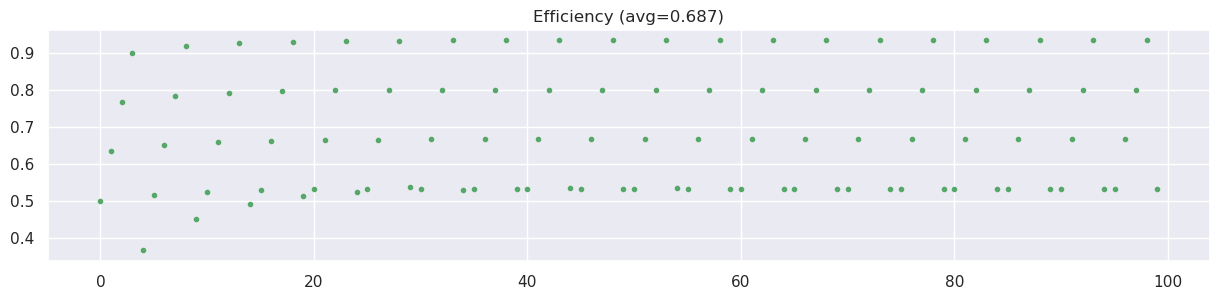

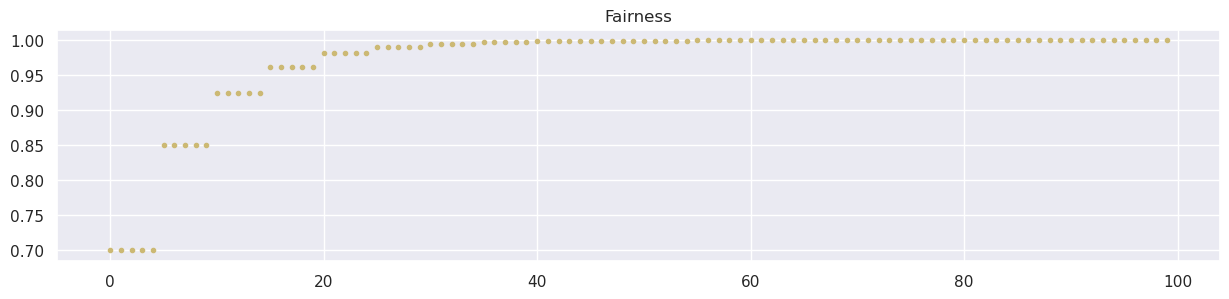

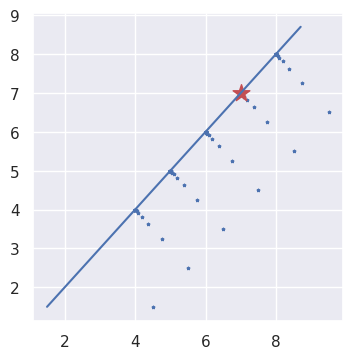

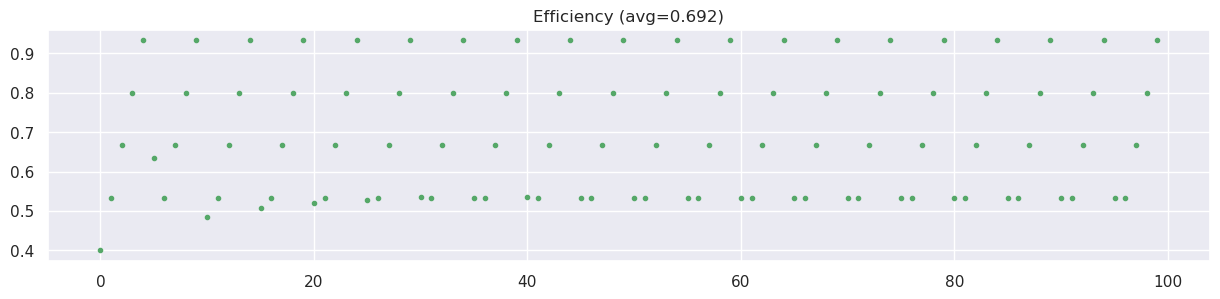

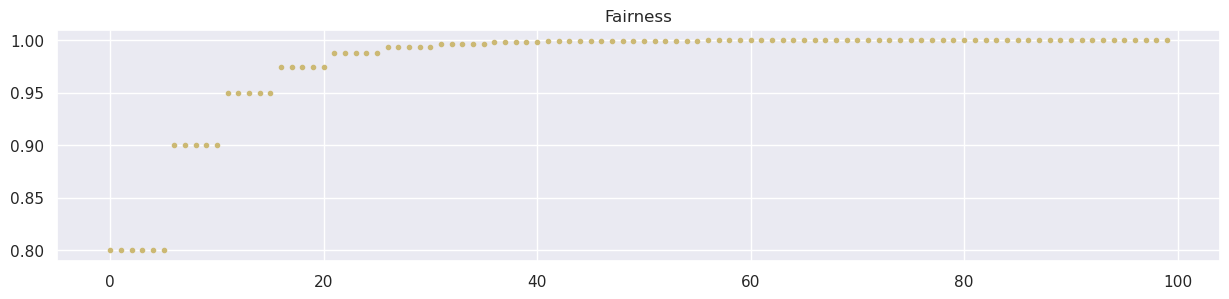

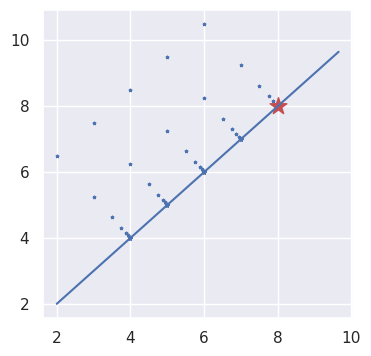

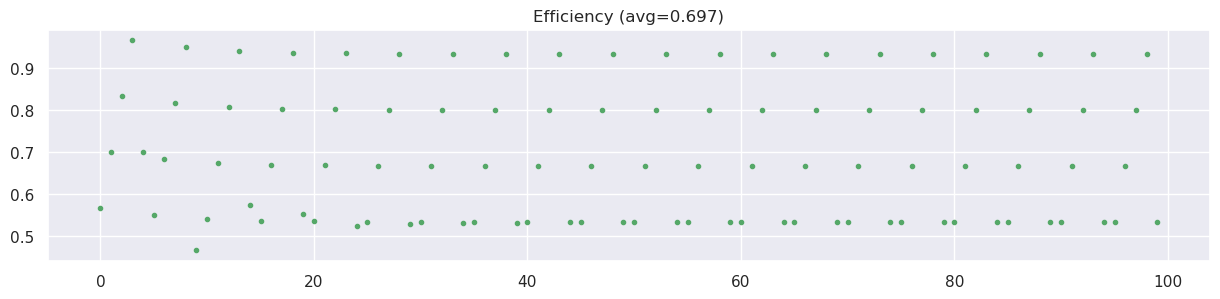

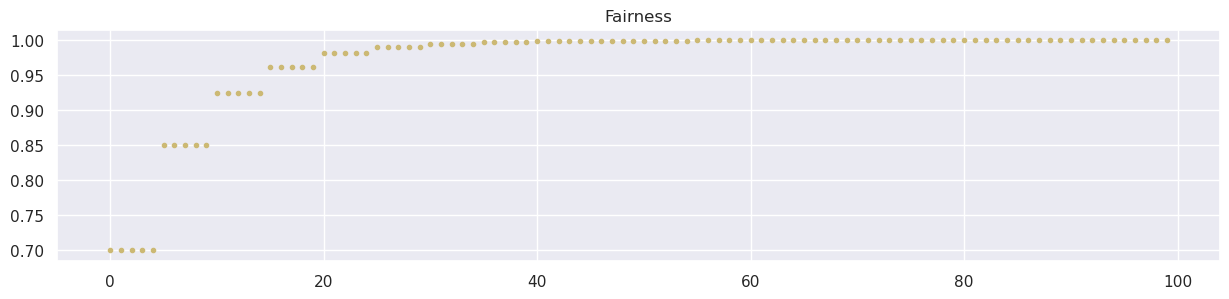

In [5]:
for i in range(10):
    p1, p2, o, f = trial()
    
    # plot p1, p2, eff and fariness
    plt.figure(figsize = [4,4])
    plt.scatter(p1, p2, marker="*", s=4)
    plt.scatter(p1[-1:], p2[-1:], marker="*", color="r", s=160)
    
    # fair line
    l = np.concatenate((p1,p2))
    a, b = np.min(l), np.max(l)
    r = np.arange(a, b, (b-a)/10)
    plt.plot(r, r)
    plt.show()
    
    # efficiency
    plt.figure(figsize = [15,3])
    plt.scatter(range(len(o)), o, marker=".", color="g")
    avg_eff = np.average(o)
    plt.title("Efficiency (avg={:.3})".format(avg_eff))
    plt.show()
    
    # fairness
    plt.figure(figsize = [15,3])
    plt.scatter(range(len(f)), f, marker=".", color='y')
    plt.title("Fairness")
    plt.show()
    